# Navigation
---


In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch
import random
from collections import deque
from dqn_agent import Agent
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
ENV_PATH = "/Users/amr/Downloads/DRL/deep-reinforcement-learning/p1_navigation/Banana"

### 1. Initialise customised Banana Collecter environment

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
def initialise_env(ENV_PATH):
    env = UnityEnvironment(file_name=ENV_PATH)
    # in this project, we are only using one agent, so we will only work on the first `brain` in the environmet
    # get the default brain
    brain_name = env.brain_names[0]
    brain = env.brains[brain_name]
    return env, brain, brain_name

In [5]:
env, brain, brain_name = initialise_env(ENV_PATH)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 



### 2. Initialise the agent

In [7]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]
action_size = brain.vector_action_space_size
state_size = len(env_info.vector_observations[0])
agent = Agent(state_size=state_size, action_size=action_size, seed=0)

### 3. Train agent

In [11]:
def train_dqn(agent, n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset(train_mode=True)[brain_name].vector_observations[0]
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]   
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            print('saved temporary learned weight')
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            print('agent done training')
            break
    return scores


In [12]:

if os.path.isfile('./checkpoint.pth'):
    # load the weights from file
    agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))
    
scores = train_dqn(agent, n_episodes=10000)

Episode 100	Average Score: 0.76
saved temporary learned weight
Episode 200	Average Score: 3.75
saved temporary learned weight
Episode 300	Average Score: 8.05
saved temporary learned weight
Episode 400	Average Score: 9.41
saved temporary learned weight
Episode 500	Average Score: 12.00
saved temporary learned weight
Episode 535	Average Score: 13.00
Environment solved in 435 episodes!	Average Score: 13.00
agent done training


In [9]:
if os.path.isfile('./checkpoint.pth'):
    # load the weights from file
    agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))

#### 4. Plot performance

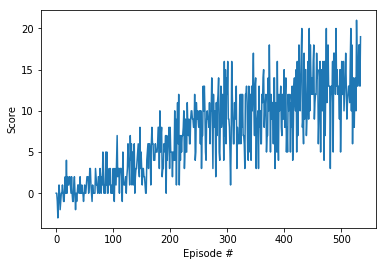

In [14]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 5. Watch a trained agent!

In [8]:
def watch_banana_agent(agent, env, n_episodes=4, n_steps=300):

                                   
    
    for episode in range(n_episodes):
        
        env_info = env.reset(train_mode=False)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0                                          # initialize the score
        
        for step in range(n_steps):

            action = agent.act(state)                 # select an action
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            score += reward                                # update the score
            state = next_state                             # roll over the state to next time step
            if done:                                       # exit loop if episode finished
                break

        print("Score: {}".format(score))

In [10]:
watch_banana_agent(agent, env)

Score: 3.0
Score: 9.0
Score: 8.0
Score: 20.0


In [15]:
env.close()